In [2]:
import xarray as xr
import numpy as np

1. need to find total mean of 22 years 
2. need to find total mean of each year.
3. sub total mean of 22 y from each yearly mean, find standardized anomaly
4. for ctcz and nino3.4

In [2]:
path = '/home/amal/dir/gpmdaily/'

In [3]:
sam = xr.open_dataset('/home/amal/dir/gpmdaily/2001/3B-DAY.MS.MRG.3IMERG.20010603-S000000-E235959.V06.nc4')

In [4]:
sample = sam.precipitationCal[0,:,:].sel(lat=slice(15, 25), lon=slice(75, 85)).values

In [5]:
np.mean(sample)

8.350665

### CTCZ

In [6]:
import os
import fnmatch

In [7]:
def gen_find_files_ct(filepatt, top):
    
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)

def gen_opener_ct(filenames):
    
    for filename in filenames:
        if filename.endswith('.nc4'):
            fc = xr.open_dataset(filename)                    
            mean_ct = np.mean(fc.precipitationCal[0,:,:].sel(lat=slice(15, 25), lon=slice(75, 85)).values)
        
        yield mean_ct
        

In [8]:
ctcz_yrly = np.array([7.2871447, 6.9551497, 6.3826294, 8.024538, 7.139179, 8.673258, 8.354882, 8.591435, 7.961072, 6.9573216, 8.546199, 8.250655, 8.200523, 8.942336, 6.8241377, 7.6388674, 8.549162, 7.0945683, 6.890301, 8.51846, 8.276254, 7.7689505])

In [12]:
#total avg of 22 years
ct = gen_find_files_ct('*.nc4', path)
cz = gen_opener_ct(ct)

In [13]:
ctcz_mean = np.array(list(cz))

In [14]:
ctcz_clim = np.mean(ctcz_mean)

In [15]:
ctcz_clim

7.810044

In [6]:
ctcz_clim = 7.810044

In [10]:
ctcz_cli = ctcz_yrly.mean()
ctcz_cli

7.81031924090909

In [9]:
ctcz_anom = ctcz_yrly - ctcz_clim

In [24]:
#standardization
ctcz_stdd = ctcz_anom/ctcz_yrly.std()

In [14]:
ctcz_anom

array([-0.52317454, -0.85516954, -1.42768984,  0.21421876, -0.67114024,
        0.86293876,  0.54456276,  0.78111576,  0.15075276, -0.85299764,
        0.73587976,  0.44033576,  0.39020376,  1.13201676, -0.98618154,
       -0.17145184,  0.73884276, -0.71575094, -0.92001824,  0.70814076,
        0.46593476, -0.04136874])

### NINO3.4

In [19]:
sample = sam.precipitationCal[0,:,:].sel(lat=slice(-5, 5), lon=slice(-170, -120))
sample

<xarray.DataArray 'precipitationCal' (lon: 500, lat: 100)>
array([[ 0.135351,  0.057056,  0.074214, ...,  1.866383,  2.104361,  2.447315],
       [ 0.067222,  0.046649,  0.064498, ...,  0.984402,  1.564437,  2.12359 ],
       [ 0.08951 ,  0.039489,  0.05238 , ...,  1.108986,  1.151028,  1.483484],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  5.239247,  7.925328, 15.292285],
       [ 0.      ,  0.      ,  0.      , ...,  4.651439,  5.921198, 10.444673],
       [ 0.      ,  0.      ,  0.      , ...,  3.33505 ,  4.036134,  6.010493]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -169.9 -169.8 -169.8 -169.6 ... -120.2 -120.1 -120.0
  * lat      (lat) float32 -4.95 -4.85 -4.75 -4.65 -4.55 ... 4.65 4.75 4.85 4.95
    time     object 2001-06-03 00:00:00
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate

In [21]:
def gen_find_files_ni(filepatt, top):
    
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)
            
            
def gen_opener_nino(filenames):
    
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)
            nino_mean = np.mean(f.precipitationCal[0,:,:].sel(lat=slice(-5, 5), lon=slice(-170, -120)).values)
            
        yield nino_mean


In [24]:
ni = gen_find_files_ni('*.nc4', path)
no = gen_opener_nino(ni)

In [17]:
nino_mean = np.array(list(no))

NameError: name 'no' is not defined

In [26]:
nino_clim = np.mean(nino_mean)
nino_clim

1.1367409

In [1]:
nino_clim = 1.1367409

In [3]:
nino_yearly = np.array([0.78603846, 0.96707565, 1.9397724, 0.6491788, 1.1310894, 1.1369839, 1.1851085, 0.58902943, 1.0805206, 1.8587512, 0.34067497, 1.1755369, 1.7347848, 0.5450486, 1.3505951, 4.3490596, 0.39365634, 0.89861125, 0.8322839, 1.0137532, 0.3923789, 0.65227866])

In [4]:
nino_anom = nino_yearly - nino_clim

array([-3.5070244e-01, -1.6966525e-01,  8.0303150e-01, -4.8756210e-01,
       -5.6515000e-03,  2.4300000e-04,  4.8367600e-02, -5.4771147e-01,
       -5.6220300e-02,  7.2201030e-01, -7.9606593e-01,  3.8796000e-02,
        5.9804390e-01, -5.9169230e-01,  2.1385420e-01,  3.2123187e+00,
       -7.4308456e-01, -2.3812965e-01, -3.0445700e-01, -1.2298770e-01,
       -7.4436200e-01, -4.8446224e-01])

In [25]:
#standardization
nino_stdd = nino_anom/nino_yearly.std()

### Scatter

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
yr = list(range(2000, 2022))


[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [30]:
str_yr = ['{}'.format(tex) for tex in yr]
strg_yr = ['{}'.format(t[2:4]) for t in str_yr]
strg_yr

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21']

In [35]:
len(nino_stdd)

22

In [36]:
len(ctcz_stdd)

22

In [37]:
len(strg_yr)

22

In [32]:
for i, text in enumerate(strg_yr):
    print(text)

0 00
1 01
2 02
3 03
4 04
5 05
6 06
7 07
8 08
9 09
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21


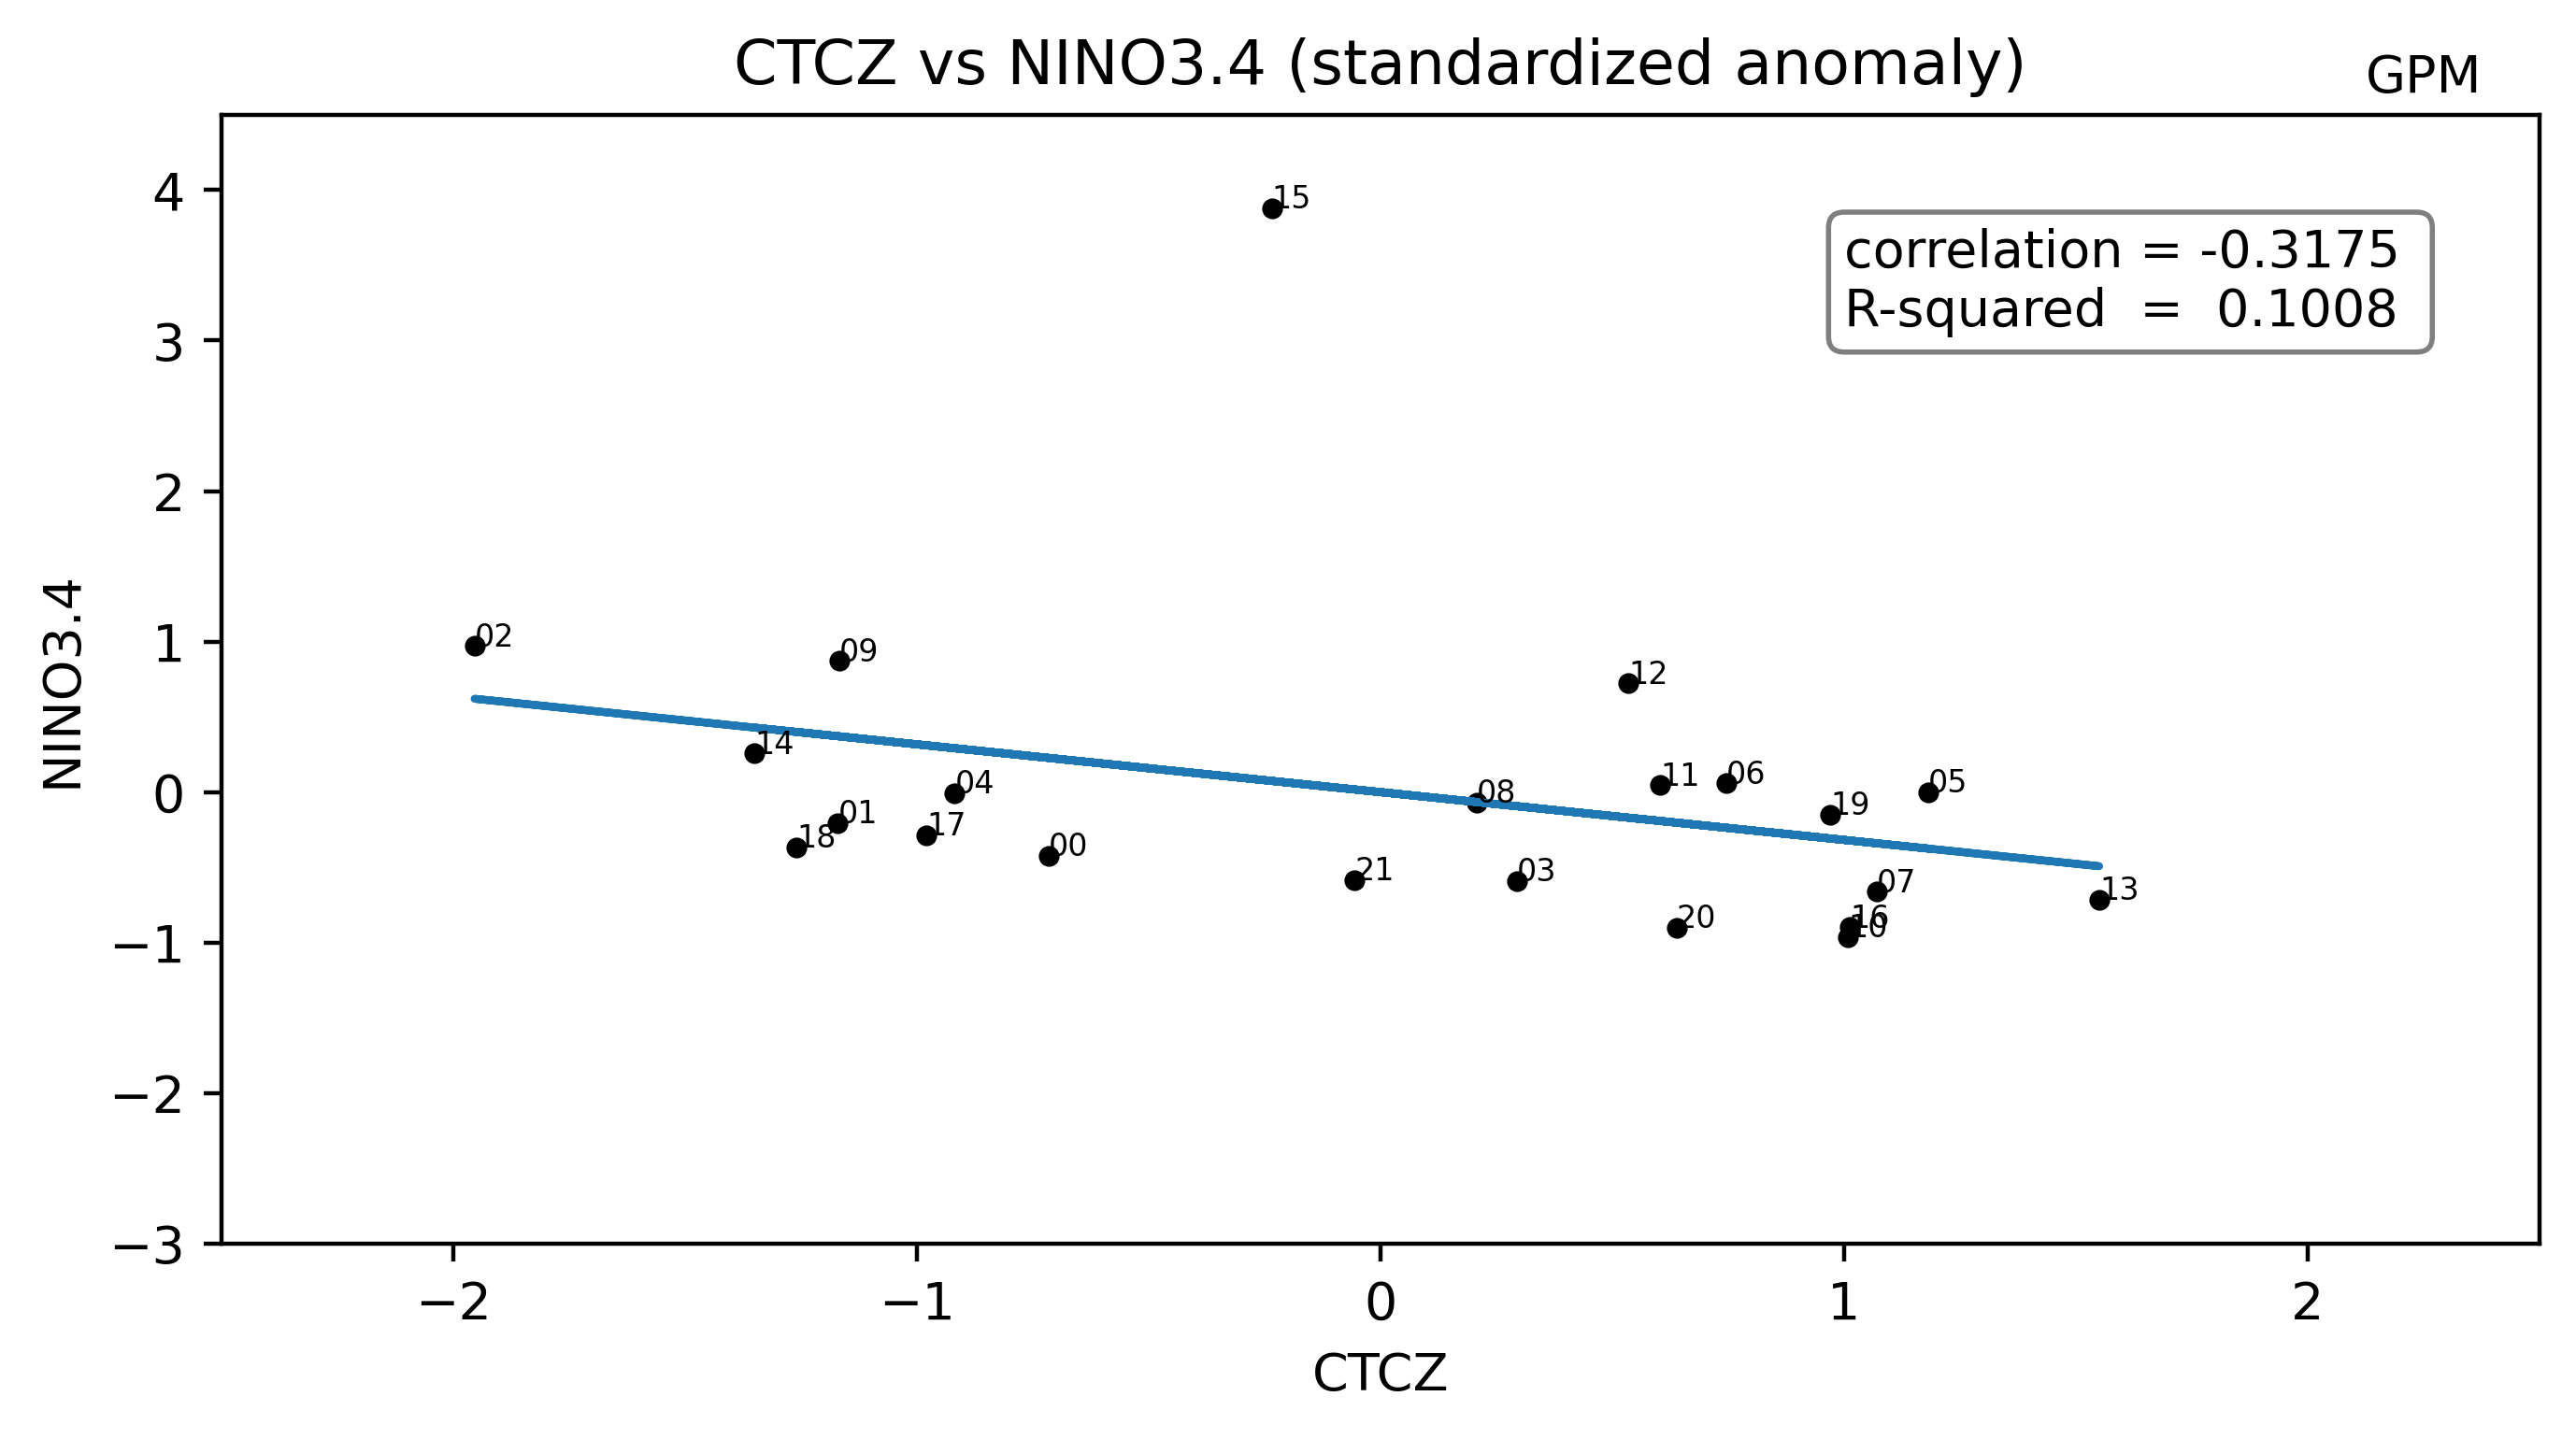

In [49]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

#set title and plot the data
ax.set_title('CTCZ vs NINO3.4 (standardized anomaly)')
ax.plot(ctcz_stdd, nino_stdd, '.', color='black' )

#add linear regression line to scatterplot 
m, b = np.polyfit(ctcz_stdd, nino_stdd, 1)
plt.plot(ctcz_stdd, m*ctcz_stdd+b) #color='black'

#labelling axes and setting limits
ax.set(xlim=(-2.5, 2.5), ylim=(-3, 4.5), xlabel='CTCZ', ylabel='NINO3.4') #xlim=(-2, 2), ylim=(-2, 2), xticks=(np.arange(-2, 2, 0.5)), yticks=(np.arange(-2, 2, 0.5))

#text box
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.70, 0.90, 'correlation = -0.3175 \nR-squared  =  0.1008', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax.text(0.95, 1.01, 'GPM', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

#annotation
for i, txt in enumerate(strg_yr):
    ax.annotate(txt, (ctcz_stdd[i], nino_stdd[i]), fontsize=6)



;

#plt.savefig('/home/amal/dir/scatter/ctcz_vs_nino3.4_gpm_rainfall_standardized_anomaly.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

<AxesSubplot:>

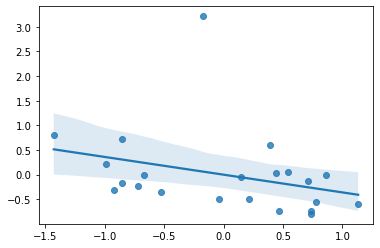

In [48]:
sns.regplot(ctcz_anom, nino_anom)

In [47]:
np.corrcoef(ctcz_stdd, nino_stdd)

array([[ 1.       , -0.3175083],
       [-0.3175083,  1.       ]])

In [13]:
from scipy import stats

In [14]:
stats.pearsonr(ctcz_anom, nino_anom)

(-0.31750829714084067, 0.14989974027153938)

In [15]:
res = stats.linregress(ctcz_anom, nino_anom)

In [16]:
res.rvalue**2

0.10081151875327637